In [1]:
import numpy as np
np.random.seed(0)

def compute_reciprosal(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0/values[i]
    return output
values = np.random.randint(1,10, size=5)
compute_reciprosal(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [2]:
big_array = np.random.randint(1,100, size=1000000)
%timeit compute_reciprosal(big_array) 

2.6 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
# это очень медленно, нужно что-то другое для скорост

In [4]:
%timeit (1.0/big_array)

8.98 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
mas_0 = np.zeros(10000000)
mas_1 = np.zeros(10000000)

In [6]:
%timeit np.power(2, mas_0, out=mas_1)

75.2 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit mas = np.power(2, mas_0)

180 ms ± 50.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit mas = mas_1 **2

68.7 ms ± 9.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Aggregation Min Max and more

In [9]:
L = np.random.random(1000000)
np.sum(L), L.sum()

(500222.4725885841, 500222.4725885841)

In [10]:
%timeit sum(L)
%timeit np.sum(L)


176 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.32 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
M = [0]*1000000
L = np.zeros(1000000)
%timeit sum(M)
%timeit np.sum(L)

13.9 ms ± 891 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.38 ms ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
X = np.random.random((10,3))
Xmean = X.mean(axis=0)
X_centered = X - Xmean
X_centered.mean(0)

array([5.55111512e-17, 6.66133815e-17, 3.33066907e-17])

In [13]:
x = np.linspace(0,10, 1000)
y = np.linspace(0,10, 1000)[:, np.newaxis]
z = np.sin(x) ** 2 + np.cos(y) ** 2
print(x.shape, y.shape, z.shape)


(1000,) (1000, 1) (1000, 1000)


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt


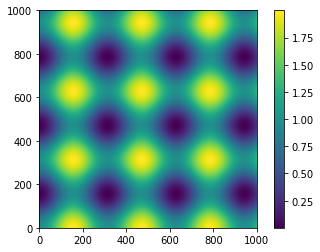

In [15]:
plt.imshow(z, origin='lower',
          cmap = 'viridis')
plt.colorbar()

# Comparison, Masks,  Boolen Logic

In [16]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP']
inches = rainfall /254
inches.shape

(365,)

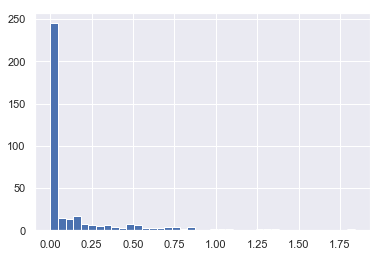

In [17]:
import seaborn; seaborn.set()
plt.hist(inches, 40);

In [18]:
x = np.array([1,2,3,4,5])
x<3

array([ True,  True, False, False, False])

In [19]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [20]:
print(x)
print(x<6)
print(np.sum(x<6))
print(np.sum(x<6, axis = 1))

print(x[x<6])

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]
8
[4 2 2]
[5 0 3 3 3 5 2 4]


In [21]:
print("Number days without rain   :   ", np.sum(inches ==0))
print("Number days with:              ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with <0.1 inches   :", np.sum((inches>0) & (inches<0.2)))

Number days without rain   :    215
Number days with:               150
Days with more than 0.5 inches: 37
Rainy days with <0.1 inches   : 75


### Boolean Arrays as Mask

In [22]:
summer = (np.arange(365)-172<90) & (np.arange(365)-172>0)

In [23]:
summer.shape, inches[summer].shape

((365,), (89,))

# Fancy Indexing

In [25]:
x = np.random.randint(100, size=10)

In [33]:
ind = [3,7,4]
ind_2 = np.array([[3,7],
                  [4,5]])
print(x,'\n',x[ind], '\n',x[ind_2])

[55 82 50 67 51 28 91 56 77 99] 
 [67 56 51] 
 [[67 56]
 [51 28]]


In [38]:
X = np.arange(12).reshape((3,4))
print(X,'\n', X[2, [0,3]]) #смешанная система получается в этом месте

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
 [ 8 11]


In [56]:
mean = [0,0]
cov = [[1,2],
      [2,6]]
X = np.random.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

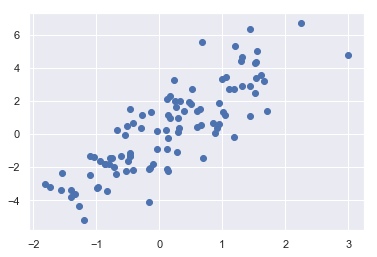

In [57]:
plt.scatter(X[:, 0], X[:,1])

In [80]:
#Выбираем 20 случайных чисел из 100
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([12, 94, 41, 24, 86, 20, 33,  4, 30, 82, 88, 45, 99, 71, 23, 25, 67,
       39, 79,  3])

In [60]:
selection = X[indices]
selection

array([[ 0.94457588,  1.8517609 ],
       [ 1.10523669,  2.73943818],
       [-0.83595708, -3.44855331],
       [ 2.99813019,  4.7591536 ],
       [ 0.10581323,  0.24683493],
       [-0.49657176, -1.62445866],
       [ 1.30526983,  2.88046176],
       [ 0.85945486,  0.6940095 ],
       [ 0.24388507,  1.99241783],
       [ 1.19261268, -0.19964236],
       [ 0.91826988,  0.38543949],
       [ 0.39025427,  1.40156999],
       [ 0.68865897, -1.440453  ],
       [-0.4696797 , -1.31300828],
       [ 0.878133  ,  0.07433919],
       [ 0.66328937,  0.55968689],
       [ 0.11797154, -0.89838672],
       [-1.04053349, -1.40949763],
       [-0.60333068, -1.34831057],
       [ 0.16486109,  2.31626546]])

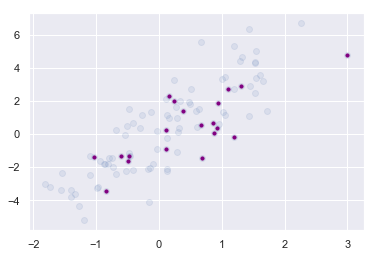

In [79]:
seaborn.set()
plt.scatter(X[:, 0], X[:,1], alpha=0.1)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='purple', s=10)

In [92]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
x.sort()
print("Номера аргументов: ",i,"\nОтсортированный массив: ", x)




Номера аргументов:  [1 0 3 2 4] 
Отсортированный массив:  [1 2 3 4 5]
